In [15]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv('data.csv')  # Remplacez par le chemin fichier
print("Aperçu des données :")
print(data.head())  # Aperçu rapide des premières lignes du dataset

Aperçu des données :
   adult                      genres     id  \
0  False   Animation, Comedy, Family    862   
1  False  Adventure, Fantasy, Family   8844   
2  False             Romance, Comedy  15602   
3  False      Comedy, Drama, Romance  31357   
4  False                      Comedy  11862   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

   release_date                        title  vote_average  vote_count  \
0          1995                    Toy Story           7.7        5415   
1          1995                      Jumanji           6.9        2413   
2          1995             Grumpier Old Men           6.5       

In [16]:
# 1. Analyse descriptive générale
print("\nStatistiques descriptives générales :")
print(data.describe(include='all'))  # Donne un résumé statistique des colonnes numériques et catégoriques


Statistiques descriptives générales :
        adult genres             id            overview    popularity  \
count   30311  30311   30311.000000               30311  30311.000000   
unique      2   3367            NaN               29630           NaN   
top     False  Drama            NaN  No overview found.           NaN   
freq    30306   3472            NaN                  72           NaN   
mean      NaN    NaN   92776.735278                 NaN      3.861770   
std       NaN    NaN  108875.005826                 NaN      7.066709   
min       NaN    NaN       2.000000                 NaN      0.000000   
25%       NaN    NaN   17826.500000                 NaN      0.657683   
50%       NaN    NaN   43923.000000                 NaN      1.789882   
75%       NaN    NaN  119782.500000                 NaN      5.703507   
max       NaN    NaN  464207.000000                 NaN    547.488298   

        release_date        title  vote_average    vote_count        keywords  \
cou

In [17]:
# 2. Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(data.isnull().sum())  # Identifie le nombre de valeurs manquantes dans chaque colonne


Valeurs manquantes par colonne :
adult           0
genres          0
id              0
overview        0
popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
keywords        0
cast            0
dtype: int64


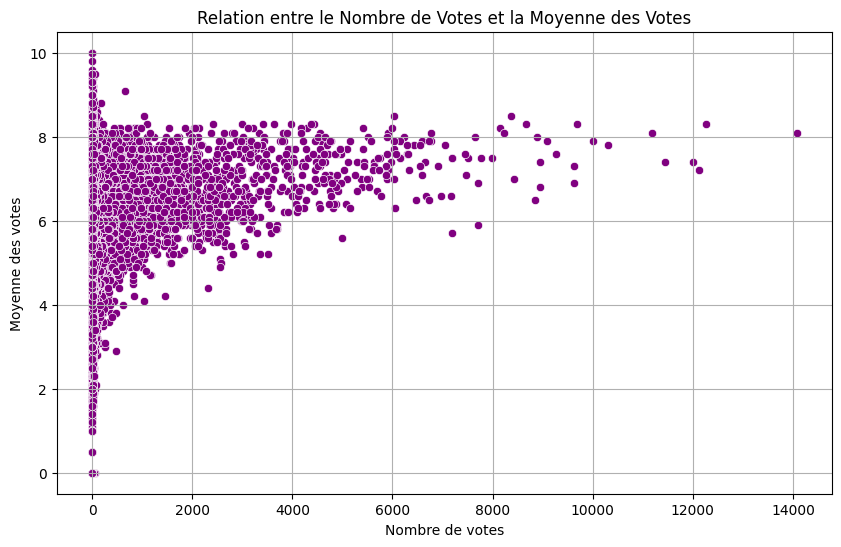

In [18]:
# Relation entre 'vote_count' et 'vote_average'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['vote_count'], y=data['vote_average'], color='purple')
plt.title('Relation entre le Nombre de Votes et la Moyenne des Votes')
plt.xlabel('Nombre de votes')
plt.ylabel('Moyenne des votes')
plt.grid(True)  # Ajout d'une grille pour la lisibilité
plt.show()

Lien entre vote_count et vote_average :
Un film avec un grand vote_count et une vote_average élevée est généralement bien apprécié et populaire.

Par exemple :

Film A : vote_count = 5000, vote_average = 8.8 (populaire et largement apprécié).

Film B : vote_count = 50, vote_average = 9.0 (bonne note, mais peu voté : moins significatif).

Forte concentration à faible nombre de votes : On observe une très forte densité de points dans la partie gauche du graphique, là où le "Nombre de votes" est faible (proche de zéro jusqu'à environ 1000). Dans cette zone, la "Moyenne des votes" varie considérablement, allant de valeurs très basses (proche de 0) à des valeurs très hautes (proche de 10).

Tendance à la stabilisation de la moyenne avec l'augmentation du nombre de votes : À mesure que le "Nombre de votes" augmente (en se déplaçant vers la droite du graphique), la dispersion des points sur l'axe des y ("Moyenne des votes") diminue. La plupart des points se concentrent dans une bande plus étroite, approximativement entre 6 et 8.

In [28]:
correlation = data['vote_count'].corr(data['vote_average'])
print(f"Corrélation entre vote_count et vote_average : {correlation}")


Corrélation entre vote_count et vote_average : 0.144076903278801


<Axes: xlabel='vote_average'>

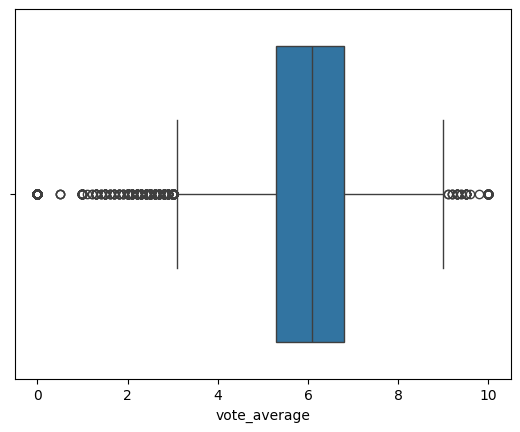

In [6]:
#boxplot
import seaborn as sns

sns.boxplot(x= data['vote_average'])

In [ ]:
import pandas as pd

# Exemple : Assurez-vous de remplacer cette ligne par vos propres données
# data = pd.read_csv("mon_dataset.csv")

# Sélectionner la colonne cible (remplacez par la colonne que vous analysez)
column = 'vote_average'  # Vous pouvez remplacer par 'vote_count' ou toute autre colonne

# Étape 1 : Calcul des quartiles et de l'IQR
Q1 = data[column].quantile(0.25)  # Premier quartile
Q3 = data[column].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1                     # Étendue interquartile

# Étape 2 : Calcul des limites inférieure et supérieure pour les valeurs normales
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

# Étape 3 : Identifier les valeurs aberrantes
outliers_lower = data[data[column] < lower_bound]  # Valeurs inférieures à la limite
outliers_upper = data[data[column] > upper_bound]  # Valeurs supérieures à la limite

# Étape 4 : Compter les valeurs aberrantes
count_lower = len(outliers_lower)  # Nombre de valeurs aberrantes inférieures
count_upper = len(outliers_upper)  # Nombre de valeurs aberrantes supérieures
count_total = count_lower + count_upper  # Total des valeurs aberrantes

# Résultats
print(f"Nombre de valeurs aberrantes inférieures : {count_lower}")
print(f"Nombre de valeurs aberrantes supérieures : {count_upper}")
print(f"Nombre total de valeurs aberrantes : {count_total}")

# Facultatif : Afficher les valeurs aberrantes (exemple avec les colonnes supplémentaires comme 'title')
print("Valeurs aberrantes inférieures :")
print(outliers_lower[['title', column]])  # Ajoutez d'autres colonnes si nécessaire
print("\nValeurs aberrantes supérieures :")
print(outliers_upper[['title', column]])


Nombre de valeurs aberrantes inférieures : 1627
Nombre de valeurs aberrantes supérieures : 105
Nombre total de valeurs aberrantes : 1732
Valeurs aberrantes inférieures :
                                    title  vote_average
59     Lawnmower Man 2: Beyond Cyberspace           2.8
94           Headless Body in Topless Bar           0.0
196                             Dream Man           2.5
213                                 Gordy           3.0
348                                Homage           0.0
...                                   ...           ...
30243                         King's Road           0.0
30244                   Siv Sleeps Astray           0.0
30251                      The Good Herbs           0.0
30252                   Mr. Blot in Space           0.0
30294                        Starquest II           2.0

[1627 rows x 2 columns]

Valeurs aberrantes supérieures :
                                        title  vote_average
163                                  Re

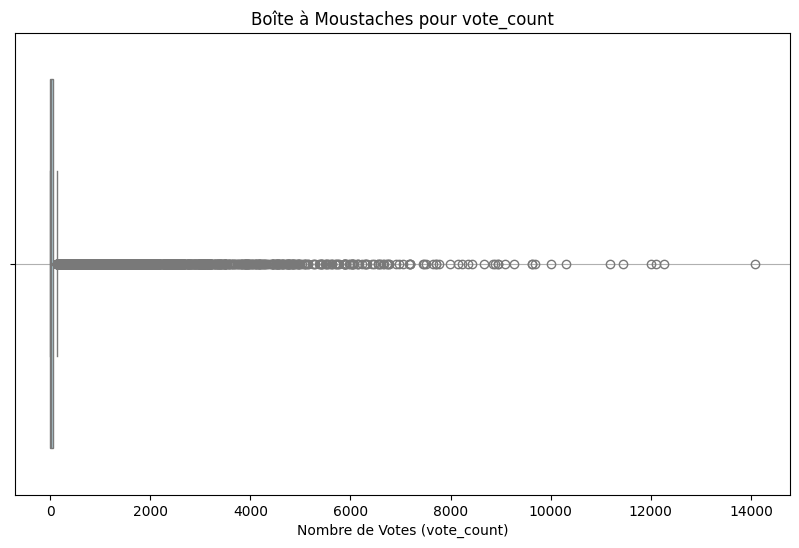

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la boîte à moustaches pour vote_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='vote_count', color='lightblue')  # Remplace 'vote_count' par le nom exact de ta colonne
plt.title("Boîte à Moustaches pour vote_count")
plt.xlabel("Nombre de Votes (vote_count)")
plt.grid(axis='y')  # Ajoute une grille horizontale pour une meilleure lisibilité
plt.show()

In [11]:
import pandas as pd

# Charger votre dataset (remplacez "mon_dataset.csv" par votre fichier)
# Exemple : data = pd.read_csv("mon_dataset.csv")

# Sélectionner la colonne cible (remplacez par la colonne à analyser)
column = 'vote_count'  # Analyse des valeurs aberrantes pour vote_count

# Étape 1 : Calcul des quartiles et de l'IQR
Q1 = data[column].quantile(0.25)  # Premier quartile
Q3 = data[column].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1                     # Étendue interquartile

# Définir les limites inférieure et supérieure pour les valeurs normales
lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
upper_bound = Q3 + 1.5 * IQR  # Limite supérieure

# Étape 2 : Identifier les valeurs aberrantes
outliers_lower = data[data[column] < lower_bound]  # Valeurs aberrantes inférieures
outliers_upper = data[data[column] > upper_bound]  # Valeurs aberrantes supérieures

# Étape 3 : Afficher les valeurs aberrantes et leur nombre
print("Valeurs aberrantes inférieures :")
print(outliers_lower[[column]])  # Afficher les détails des valeurs inférieures
print(f"Nombre de valeurs aberrantes inférieures : {len(outliers_lower)}")

print("\nValeurs aberrantes supérieures :")
print(outliers_upper[[column]])  # Afficher les détails des valeurs supérieures
print(f"Nombre de valeurs aberrantes supérieures : {len(outliers_upper)}")

print(f"\nNombre total de valeurs aberrantes : {len(outliers_lower) + len(outliers_upper)}")


Valeurs aberrantes inférieures :
Empty DataFrame
Columns: [vote_count]
Index: []
Nombre de valeurs aberrantes inférieures : 0

Valeurs aberrantes supérieures :
       vote_count
0            5415
1            2413
4             173
5            1886
7             174
...           ...
30230         255
30231         255
30232         255
30233         255
30263         167

[4666 rows x 1 columns]
Nombre de valeurs aberrantes supérieures : 4666

Nombre total de valeurs aberrantes : 4666


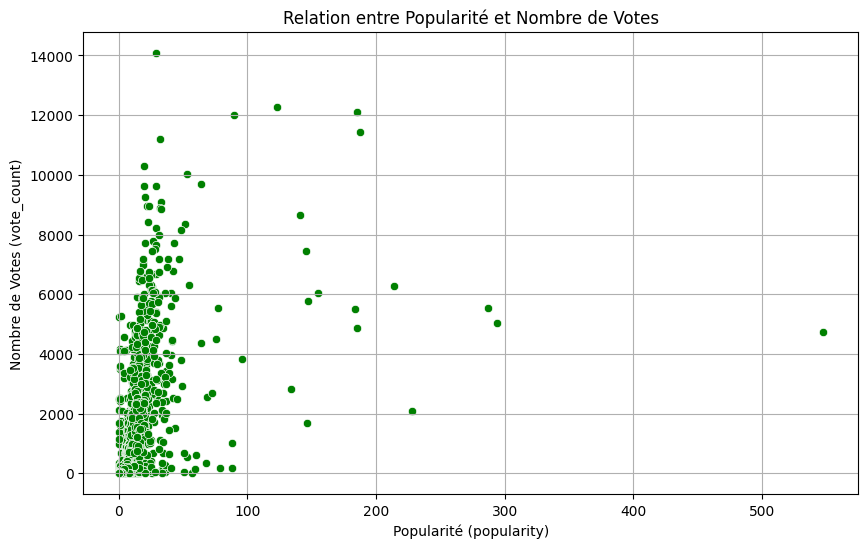

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot pour analyser la relation entre popularity et vote_count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['popularity'], y=data['vote_count'], color='green')
plt.title("Relation entre Popularité et Nombre de Votes")
plt.xlabel("Popularité (popularity)")
plt.ylabel("Nombre de Votes (vote_count)")
plt.grid(True)
plt.show()


In [16]:
# Calculer la corrélation entre popularity et vote_count
correlation = data['popularity'].corr(data['vote_count'])

# Afficher la valeur de corrélation
print(f"Corrélation entre Popularité et Nombre de Votes : {correlation}")


Corrélation entre Popularité et Nombre de Votes : 0.5534485938762421


Cela signifie qu'en général, lorsque la popularité d'un film augmente, le nombre de votes tend également à augmenter

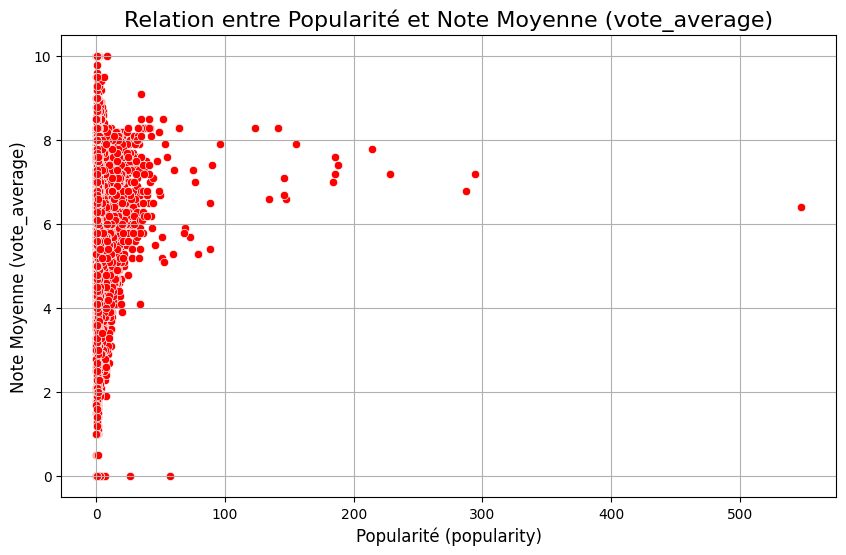

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot entre popularity et vote_average avec couleur rouge
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['popularity'], y=data['vote_average'], color='red')
plt.title("Relation entre Popularité et Note Moyenne (vote_average)", fontsize=16)
plt.xlabel("Popularité (popularity)", fontsize=12)
plt.ylabel("Note Moyenne (vote_average)", fontsize=12)
plt.grid(True)
plt.show()


In [10]:
# Calculer la corrélation entre popularity et vote_average
import pandas as pd

# Charger les données dans la variable 'data'
data = pd.read_csv("data.csv")  # Remplace "mon_dataset.csv" par ton fichier

correlation = data['popularity'].corr(data['vote_average'])

# Afficher le résultat
print(f"Corrélation entre Popularité et Note Moyenne (vote_average) : {correlation}")



Corrélation entre Popularité et Note Moyenne (vote_average) : 0.1522495353612769


indique une corrélation positive très faible entre la popularité (popularity) et la note moyenne (vote_average).

In [6]:
import pandas as pd

# Lire le dataset à partir du fichier CSV
df = pd.read_csv("data_updated.csv")

# Afficher les premières lignes, y compris la colonne 'rating'
print("Aperçu du dataset :")
print(df.head())

# Afficher des informations spécifiques sur la colonne 'rating'
print("\nInformations sur la colonne 'rating' :")
print(df['rating'].describe())  # Statistiques descriptives de la colonne 'rating'
print("\nValeurs uniques dans 'rating' :")
print(df['rating'].unique())    # Liste des valeurs uniques

# Vérification des valeurs manquantes dans 'rating'
missing_ratings = df['rating'].isnull().sum()
print(f"\nNombre de valeurs manquantes dans 'rating' : {missing_ratings}")


Aperçu du dataset :
   adult                      genres     id  \
0  False   Animation, Comedy, Family    862   
1  False  Adventure, Fantasy, Family   8844   
2  False             Romance, Comedy  15602   
3  False      Comedy, Drama, Romance  31357   
4  False                      Comedy  11862   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

   release_date                        title  vote_average  vote_count  \
0          1995                    Toy Story           7.7        5415   
1          1995                      Jumanji           6.9        2413   
2          1995             Grumpier Old Men           6.5        

In [7]:
# Supprimer les lignes avec des valeurs manquantes
df = df.dropna(subset=['rating'])

print(f"Valeurs manquantes après suppression : {df['rating'].isnull().sum()}")


Valeurs manquantes après suppression : 0


In [8]:
# Obtenir le nombre de lignes dans le dataset
nombre_lignes = df.shape[0]

print(f"Nombre de lignes restantes dans le dataset : {nombre_lignes}")


Nombre de lignes restantes dans le dataset : 30130


In [23]:
print(df['adult'].value_counts())
print(df['adult'].unique())


adult
False    28680
True         4
Name: count, dtype: int64
[False  True]


In [26]:
adult_counts = df['adult'].value_counts()
total = adult_counts.sum()
percentages = (adult_counts / total) * 100
print(percentages,"%")


adult
False    99.986055
True      0.013945
Name: count, dtype: float64 %


In [11]:
import pandas as pd
import itertools

# Chargement des données
df = pd.read_csv("data_updated.csv")

# Assurez-vous que la colonne 'genres' est au format liste, sinon nettoyez-la
df['genres'] = df['genres'].fillna('')  # Remplissage des valeurs manquantes
df['genres'] = df['genres'].str.split(',')  # Diviser les genres en listes

# Nettoyage des genres pour supprimer les espaces supplémentaires
df['genres'] = df['genres'].apply(lambda genres: [genre.strip() for genre in genres])

# Vérification après nettoyage
print("Exemple de genres nettoyés :")
print(df['genres'].head())

# Comptage des genres après nettoyage
genre_counts_cleaned = pd.Series(itertools.chain.from_iterable(df['genres'])).value_counts()

# Affichage des genres les plus fréquents
print("Genres les plus fréquents après nettoyage :")
print(genre_counts_cleaned)


Exemple de genres nettoyés :
0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object
Genres les plus fréquents après nettoyage :
Drama              14923
Comedy              9217
Thriller            5902
Romance             5091
Action              5073
Horror              3696
Crime               3438
Adventure           2859
Science Fiction     2431
Family              2003
Mystery             1964
Documentary         1876
Fantasy             1835
Animation           1299
Music               1211
History             1062
War                  990
Western              907
Foreign              710
TV Movie             535
Name: count, dtype: int64


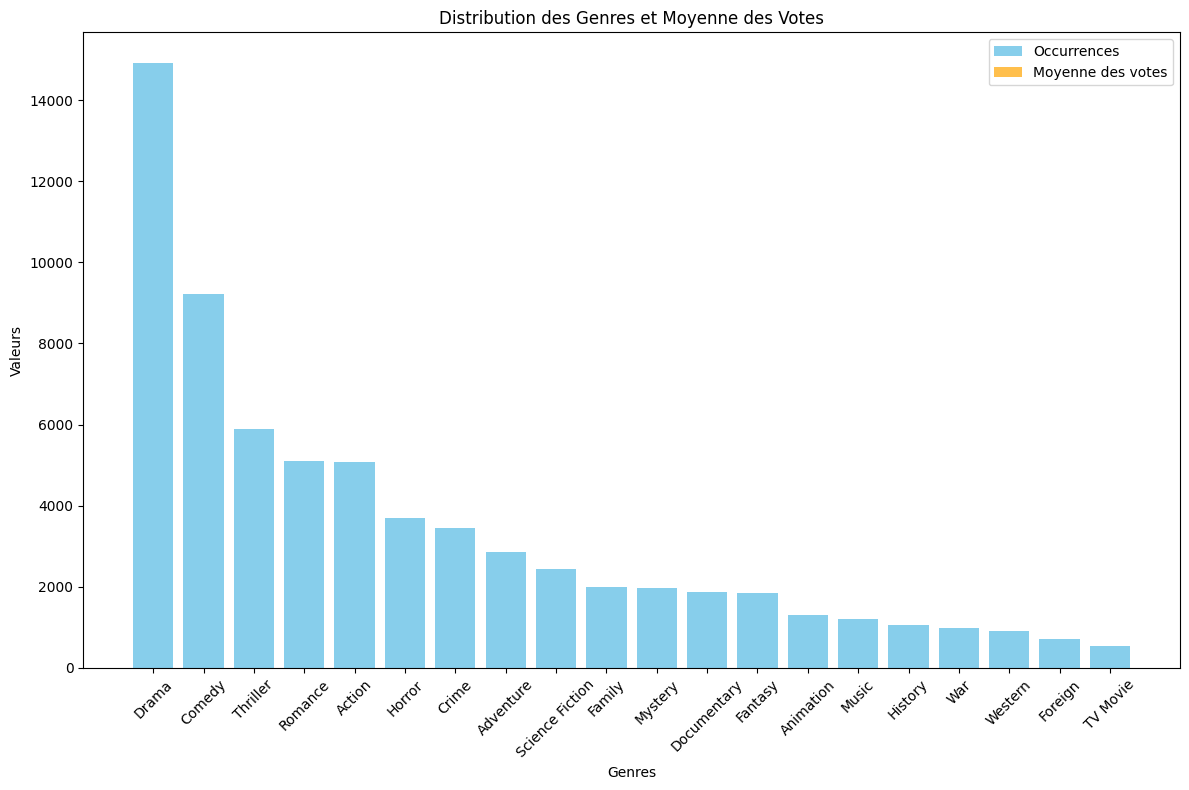

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("data_updated.csv")

# Nettoyage des genres : suppression des espaces supplémentaires
df['genres'] = df['genres'].fillna('')  # Remplissage des valeurs manquantes
df['genres'] = df['genres'].str.split(',')  # Diviser les genres en listes
df['genres'] = df['genres'].apply(lambda genres: [genre.strip() for genre in genres])  # Nettoyage des espaces

# Comptage des genres par film et calcul de la moyenne des votes
genre_popularity = {}
for index, row in df.iterrows():
    for genre in row['genres']:
        if genre not in genre_popularity:
            genre_popularity[genre] = {'count': 0, 'vote_sum': 0}
        genre_popularity[genre]['count'] += 1
        genre_popularity[genre]['vote_sum'] += row['vote_average']

# Transformer en dataframe
genre_df = pd.DataFrame.from_dict(genre_popularity, orient='index')
genre_df['vote_average'] = genre_df['vote_sum'] / genre_df['count']

# Tri par occurrence
genre_df = genre_df.sort_values(by='count', ascending=False)

# Création du graphique en barres empilées
plt.figure(figsize=(12, 8))
plt.bar(genre_df.index, genre_df['count'], label="Occurrences", color="skyblue")
plt.bar(genre_df.index, genre_df['vote_average'], label="Moyenne des votes", color="orange", alpha=0.7)

plt.xlabel("Genres")
plt.ylabel("Valeurs")
plt.title("Distribution des Genres et Moyenne des Votes")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


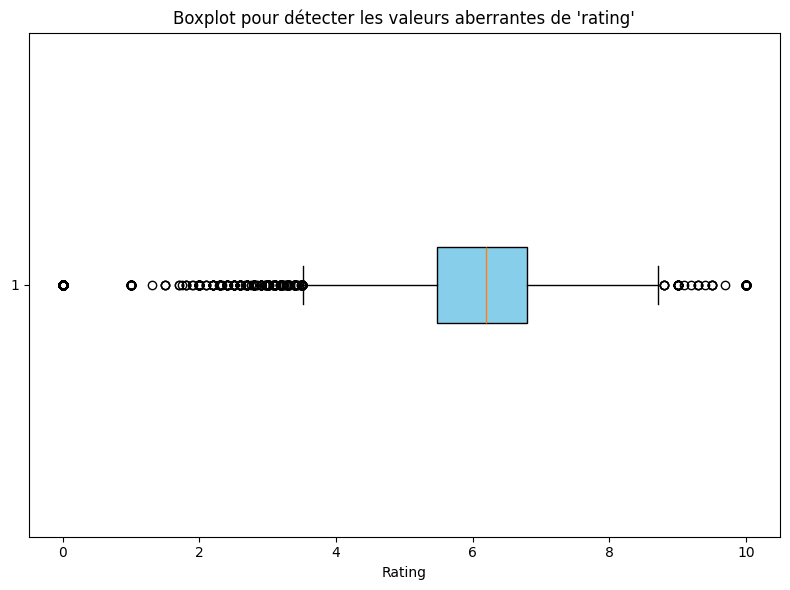

In [13]:
import matplotlib.pyplot as plt

# Création d'un graphique boxplot pour la colonne 'rating'
plt.figure(figsize=(8, 6))
plt.boxplot(df['rating'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))

# Ajout des titres et labels
plt.title("Boxplot pour détecter les valeurs aberrantes de 'rating'")
plt.xlabel("Rating")

# Affichage du graphique
plt.tight_layout()
plt.show()


In [17]:
# Calcul des quartiles
Q1 = df['rating'].quantile(0.25)  # Premier quartile
Q3 = df['rating'].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Intervalle interquartile

# Définir les bornes pour détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extraire les valeurs aberrantes faibles et élevées
outliers_low = df['rating'][df['rating'] < lower_bound]  # Valeurs faibles
outliers_high = df['rating'][df['rating'] > upper_bound]  # Valeurs élevées

# Nombre total de valeurs aberrantes
total_outliers = len(outliers_low) + len(outliers_high)

# Afficher les résultats
print("Valeurs aberrantes faibles ('rating' < borne inférieure) :")
print(outliers_low)
print(f"\nNombre de valeurs faibles : {len(outliers_low)}")

print("\nValeurs aberrantes élevées ('rating' > borne supérieure) :")
print(outliers_high)
print(f"\nNombre de valeurs élevées : {len(outliers_high)}")

print(f"\nNombre total de valeurs aberrantes : {total_outliers}")


Valeurs aberrantes faibles ('rating' < borne inférieure) :
59       3.232
94       2.700
120      0.000
158      0.000
184      0.000
         ...  
30238    0.000
30245    0.000
30265    3.200
30294    2.900
30306    0.000
Name: rating, Length: 1578, dtype: float64

Nombre de valeurs faibles : 1578

Valeurs aberrantes élevées ('rating' > borne supérieure) :
1077      9.0
1409     10.0
1762      9.4
1801     10.0
1959     10.0
         ... 
27640     9.0
28214    10.0
28938     9.0
28970    10.0
29109     9.0
Name: rating, Length: 99, dtype: float64

Nombre de valeurs élevées : 99

Nombre total de valeurs aberrantes : 1677


In [18]:
# Calcul des quartiles
Q1 = df['rating'].quantile(0.25)  # Premier quartile
Q3 = df['rating'].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Intervalle interquartile

# Définir la borne inférieure pour détecter les valeurs faibles
lower_bound = Q1 - 1.5 * IQR

# Supprimer les valeurs aberrantes faibles
df_cleaned = df[df['rating'] >= lower_bound]

# Afficher le résultat
print(f"Nombre de lignes restantes après suppression des valeurs faibles : {df_cleaned.shape[0]}")


Nombre de lignes restantes après suppression des valeurs faibles : 28552


In [21]:
# Sauvegarder le dataset nettoyé dans un nouveau fichier CSV
df_cleaned.to_csv("dataset_rating.csv", index=False)

print("Dataset nettoyé sauvegardé avec succès dans 'dataset_rating.csv'.")


Dataset nettoyé sauvegardé avec succès dans 'dataset_rating.csv'.


In [22]:
# Charger le dataset nettoyé à partir du fichier sauvegardé
df_cleaned_loaded = pd.read_csv("dataset_rating.csv")

# Afficher les premières lignes pour vérifier
print("Dataset nettoyé rechargé :")
print(df_cleaned_loaded.head())


Dataset nettoyé rechargé :
   adult                              genres     id  \
0  False   ['Animation', 'Comedy', 'Family']    862   
1  False  ['Adventure', 'Fantasy', 'Family']   8844   
2  False               ['Romance', 'Comedy']  15602   
3  False      ['Comedy', 'Drama', 'Romance']  31357   
4  False                          ['Comedy']  11862   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

   release_date                        title  vote_average  vote_count  \
0          1995                    Toy Story           7.7        5415   
1          1995                      Jumanji           6.9        2413   
2          

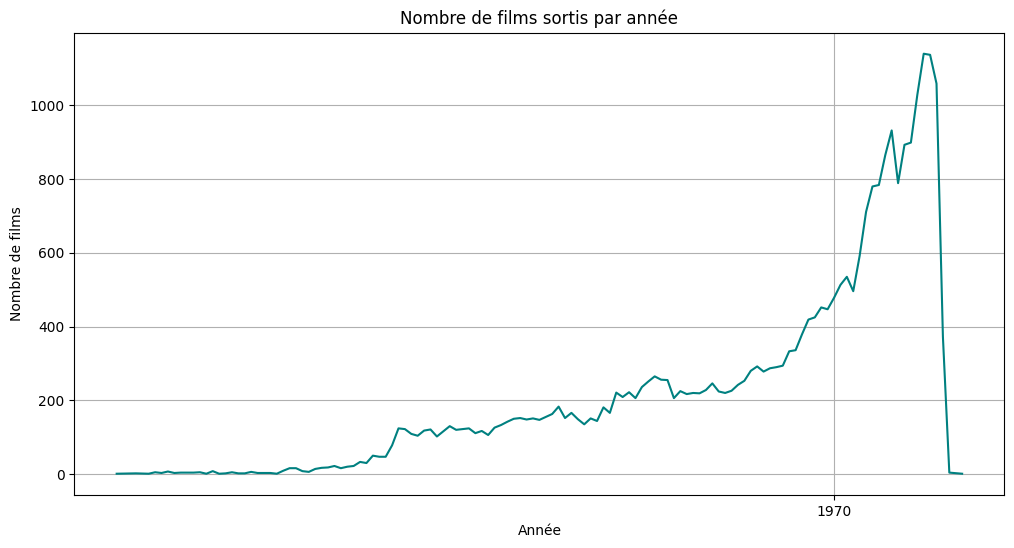

In [10]:
# Compter le nombre de films par année
films_par_annee = df["release_date"].value_counts().sort_index()

# Tracer
plt.figure(figsize=(12, 6))
sns.lineplot(x=films_par_annee.index, y=films_par_annee.values, color="teal")
plt.title("Nombre de films sortis par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.grid(True)
plt.show()

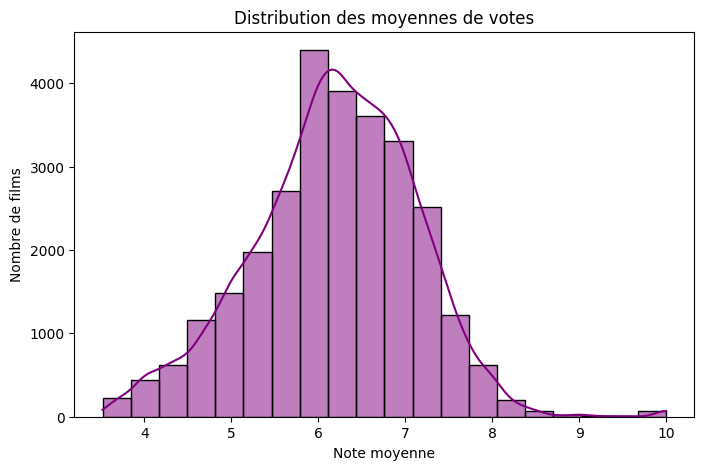

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=20, kde=True, color='purple')
plt.title("Distribution des moyennes de votes")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de films")
plt.show()

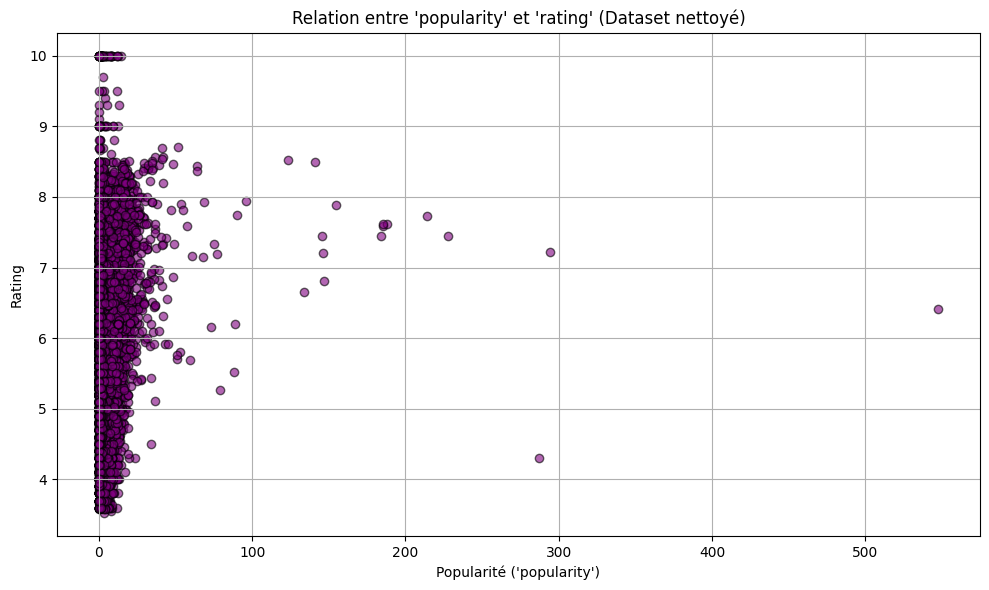

Corrélation entre 'popularity' et 'rating' (Dataset nettoyé) : 0.14926910818549377


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset nettoyé
df_cleaned = pd.read_csv("dataset_rating.csv")

# Création du nuage de points pour visualiser la relation
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['popularity'], df_cleaned['rating'], alpha=0.6, c='purple', edgecolors='black')

# Ajouter des titres et des labels
plt.title("Relation entre 'popularity' et 'rating' (Dataset nettoyé)")
plt.xlabel("Popularité ('popularity')")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Calcul de la corrélation entre 'popularity' et 'rating'
correlation = df_cleaned['popularity'].corr(df_cleaned['rating'])
print(f"Corrélation entre 'popularity' et 'rating' (Dataset nettoyé) : {correlation}")
